<a href="https://colab.research.google.com/github/katiesalas/data_analytics_2/blob/main/Machine_Learning_Logistic_Regression_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Katie Salas
Data Analytics Section 2

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and load it to a data frame called ad_data.**
The dATA PATH:
https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv

In [ ]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

In [ ]:
ad_data = df_raw

**Check the head of ad_data**

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

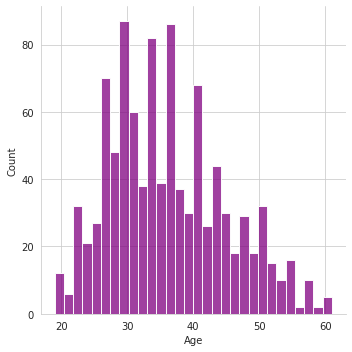

In [ ]:
sns.displot(ad_data['Age'].dropna(), color = 'purple', kde = False, bins = 30)

**Create a jointplot showing Area Income versus Age.**

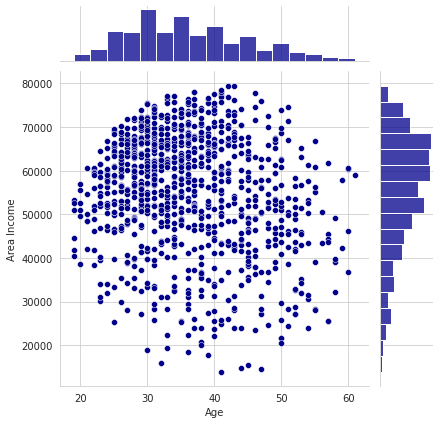

In [ ]:
sns.set_style('whitegrid')
sns.jointplot(x= ad_data['Age'] ,y= ad_data['Area Income'], color = 'darkblue')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

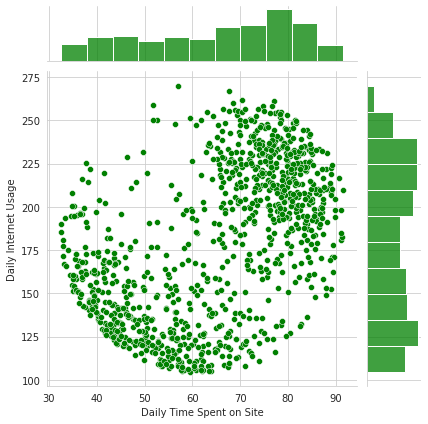

In [ ]:
sns.set_style('whitegrid')
sns.jointplot(x= ad_data['Daily Time Spent on Site'] ,y= ad_data['Daily Internet Usage'], color = "green")

# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [ ]:
#create new variable for the data set that we will spilit,let say ds=, use all the variables

from sklearn.model_selection import train_test_split 

ds = ad_data


In [ ]:
#configuring inputs and dependable variable
#Let have values from our colums as input ,call it X (usually we designate the input as capital X)
#X=ds ['Daily Time Spent on Site','ccccc',](all colums are going to be as an input )
#y=ds [name of dependent variable as an out put,Let say, 'Clicked on Ad']
y = ds['Clicked on Ad']
X = ds[['Daily Time Spent on Site',	'Age',	'Area Income',	'Daily Internet Usage',	'Male']]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# we spilit the date for terain and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

** Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [ ]:
predict = logmodel.predict(X_test)

** Create a classification report for the model.**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.92      0.89      0.90       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[127   9]
 [ 13 101]]


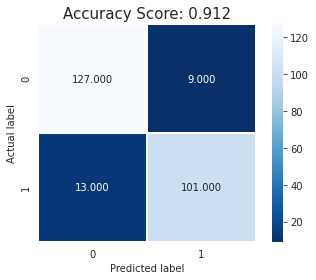

In [ ]:

sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.7, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

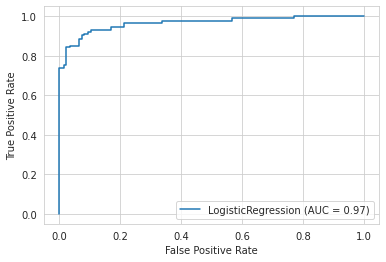

In [ ]:
from sklearn import  metrics
metrics.plot_roc_curve(logmodel, X_test, y_test)

##Conclusion: 

With an accuracy of 91%, the machine learning program can predict whether or not the user clicked on the ad, depnding on their age, sex, regional income, daily time used on site, and daily internet usage. There was roughly a 50/50 chance that the user would click on the ad or not.